# 1. Collecting the data
### Training and testing data are given by Kaggle https://www.kaggle.com/c/titanic/leaderboard

### 1.1. Load train and test dataset using Pandas

In [339]:
import pandas as pd
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

### 1.2. Data anaysis

In [340]:
train_df.head() #Preview
# test_df.head()
# train_df.info()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [341]:
test_df.head() #Preview

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### 1.3. Feature anaysis

In [342]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [343]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Plotting the Bar-graph

In [344]:
def bar_char(feature): # Bar graph represent
    survived = train_df[train_df['Survived']==1][feature].value_counts() #Counting "Survived"+feature [Pclass, sex, age, etc.]
    dead = train_df[train_df['Survived']==0][feature].value_counts() #Counting "Dead"+feature [Pclass, sex, age, etc.]
    sur_dead_tb = pd.DataFrame([survived, dead]) #Create table
    sur_dead_tb.index = ['Survived', 'Dead']

    print(sur_dead_tb) #Print 'sur_dead_tb' table 
    sur_dead_tb.plot(kind='bar', stacked=True, figsize=(7,3)) #Plot Bar graph

Counting total 'survived' and 'dead'
Dead [Survived = 0] = 549
Survived [Survived = 1] = 342

In [345]:
survived = train_df['Survived'].value_counts()
#print(survived)
sur_dead_total_tb = pd.DataFrame(survived)
print(sur_dead_total_tb)

   Survived
0       549
1       342


            1   2    3
Survived  136  87  119
Dead       80  97  372


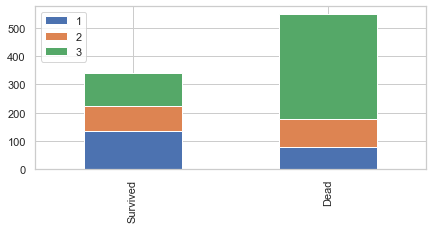

In [346]:
bar_char('Pclass') #Pclass: Ticket class= [1=1st, 2=2nd, 3=3rd]

The number of deaths in 3rd class is high. 

          female  male
Survived     233   109
Dead          81   468


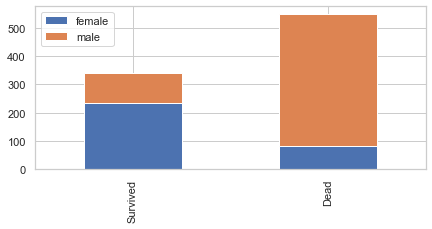

In [347]:
bar_char('Sex') #Sex: 

The number of male deaths is high. 

              0      1     2     3     4    5    8
Survived  210.0  112.0  13.0   4.0   3.0  NaN  NaN
Dead      398.0   97.0  15.0  12.0  15.0  5.0  7.0


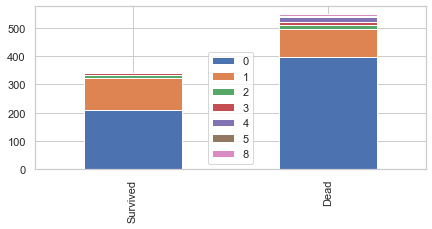

In [348]:
bar_char('SibSp') # # of siblings / spouses aboard the Titanic

              0     1     2    3    4    5    6
Survived  233.0  65.0  40.0  3.0  NaN  1.0  NaN
Dead      445.0  53.0  40.0  2.0  4.0  4.0  1.0


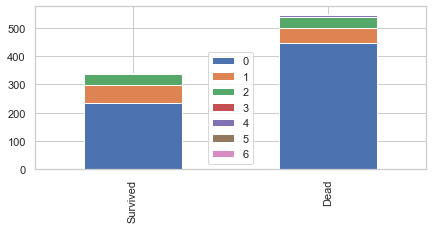

In [349]:
bar_char('Parch') # # of parents / children aboard the Titanic

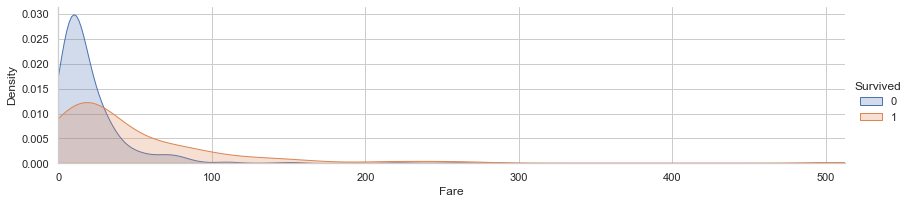

In [350]:
import matplotlib.pyplot as plt
import seaborn as sns

facet = sns.FacetGrid(train_df, hue='Survived', aspect=4) # Fare: Passenger fare
facet.map(sns.kdeplot, 'Fare', shade=True)
facet.set(xlim=(0, train_df['Fare'].max()))
facet.add_legend()
plt.show()

            S   C   Q
Survived  217  93  30
Dead      427  75  47


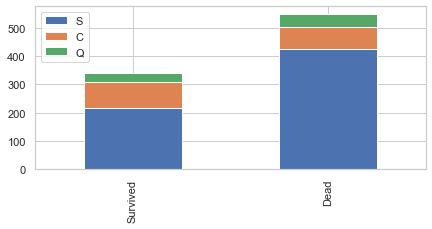

In [351]:
bar_char('Embarked') # Port of Embarkation, C=Cherbourg, Q=Qeenstown, S=Southampton

# 2. Feature Engineering

In [352]:
# Initialization
train_test_data = [train_df, test_df] # Comining train and test data, datatype = list
#print(train_test_data)

### 2.1. Pclass = Ticket Class

1등급 = 1, 2등급 = 2, 3등급 = 3 
이미 Binning 되어있으므로, Skip

이미 Binning 되어있으므로, Skip

### 2.2. Name = Miss. Mr. Mrs. 

In [353]:
for dataset in train_test_data: # '( A-Za-z+\.)': Uppercase+Lowercase ()
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)# if expand=False, label / if true, column 

In [354]:
train_df['Title'].value_counts()


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [355]:
test_df['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

The number of deaths in the 'Mr.' group was high.
Based on this result, how do we map data with a "Name" attribute?  

"Title Map"
Miss.: 0
Mrs.: 1
Mr.: 2
Master.: 3
Others: 4

In [356]:
title_mapping = {"Miss": 0, "Mrs": 1, "Mr": 2, "Master": 3,  
"Dr": 4, "Mlle": 4, "Mme": 4, "Ms": 4, "Major": 4, "Lady": 4, "Sir": 4, "Col": 4, 
"Countess": 4, "Rev": 4, "Don": 4, "Capt": 4, "Jonkheer": 4, "Dona": 4 }
print(title_mapping)

for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

{'Miss': 0, 'Mrs': 1, 'Mr': 2, 'Master': 3, 'Dr': 4, 'Mlle': 4, 'Mme': 4, 'Ms': 4, 'Major': 4, 'Lady': 4, 'Sir': 4, 'Col': 4, 'Countess': 4, 'Rev': 4, 'Don': 4, 'Capt': 4, 'Jonkheer': 4, 'Dona': 4}


In [357]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [358]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,2
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


            0   1    2   3   4
Survived  127  99   81  23  12
Dead       55  26  436  17  15


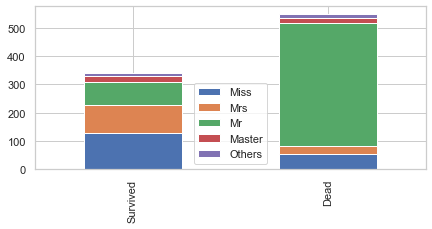

In [359]:
# Name -> Bar graph
survived = train_df[train_df['Survived']==1]['Title'].value_counts() # Survived
dead = train_df[train_df['Survived']==0]['Title'].value_counts() # Dead
#print(survived)
#print(dead)
sur_dead_tb = pd.DataFrame([survived, dead])
sur_dead_tb.index = ['Survived', 'Dead']
print(sur_dead_tb)
#Bar graph 
sur_dead_tb.plot(kind='bar', stacked=True, figsize=(7,3))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.legend(['Miss', 'Mrs', 'Mr', 'Master', 'Others'])

### 2.3. Sex = gender

Male = 1, Female = 2

In [360]:
sex_mapping = {"male": 1, "female": 2} # Dictinary 
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [361]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,2


### 2.4. Age

Appropriate classifications of the age group for risk stratification are 0–14 years old (pediatric group), 15–47 years old (young group), 48–63 years old (middle age group) and ≥ 64 years old (elderly group)[Ref1].

[Ref1] https://bmcneurol.biomedcentral.com/articles/10.1186/s12883-020-01888-w

0-14 (pediatric group) = 0
15-47 (young group) = 1
48-63 (middle age group) = 2
over 64 (elderly group) = 3

In [362]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

Age, # of Null value = 177
Q) How can we fill the null value? 
A) 'Title' + Median

1) In 'Title', Group's Null value 
'Title'=[0] Miss -> 119 
'Title'=[1] Mrs. -> 36
'Title'=[2] Mr. -> 17
'Title'=[3] Master -> 4
'Title'=[4] Others -> 1

In [363]:
age_null = train_df[train_df['Age'].isnull()]['Title'].value_counts()
print(age_null)

2    119
0     36
1     17
3      4
4      1
Name: Title, dtype: int64


In [364]:
train_df['Age'].fillna(train_df.groupby("Title")["Age"].transform("median"), inplace=True)
test_df['Age'].fillna(train_df.groupby("Title")["Age"].transform("median"), inplace=True)

In [365]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,2


In [366]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",2,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,2
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2,22.0,1,1,3101298,12.2875,NaN,S,1


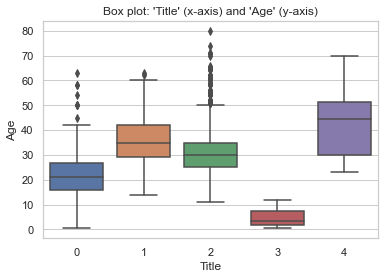

In [367]:
sns.boxplot(x='Title', y='Age', data=train_df)
plt.title("Box plot: 'Title' (x-axis) and 'Age' (y-axis)")
plt.show()

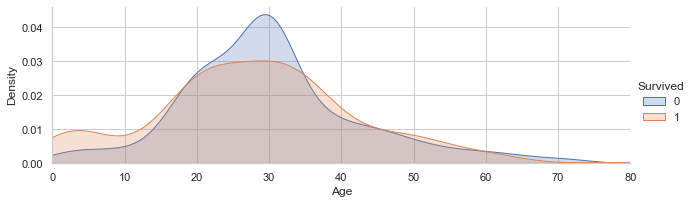

In [368]:
facet = sns.FacetGrid(train_df, hue='Survived', aspect=3)
facet.map(sns.kdeplot, 'Age', shade = True)
facet.set(xlim=(0, train_df['Age'].max()))
facet.add_legend()
plt.show()

> Age Binning  
Pediatric: 0–14 > 0   
Young: 15–47 > 1  
Middle: 48–63 > 2  
Elderly: over 64 > 3  

In [370]:
for dataset in train_test_data: # loc()= a way to search usingㅣabel or condition
    dataset.loc[ dataset['Age']<=14, 'Age']=0
    dataset.loc[(dataset['Age']>14) & (dataset['Age'] <= 47), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 47) & (dataset['Age'] <= 63), 'Age'] = 2
    dataset.loc[dataset['Age'] > 63, 'Age'] = 3

In [371]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,0.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,0.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",2,0.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,0.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",1,0.0,0,0,373450,8.0500,NaN,S,2


### 2.5. SibSp = the number of siblings / spouses aboard the Titanic

In [372]:
sur_sibsp = train_df[train_df['Survived']==1]['SibSp'].value_counts()
dead_sibsp = train_df[train_df['Survived']==0]['SibSp'].value_counts()
#print(sur_sibsp)
#print(dead_sibsp)
sibsp_count = pd.DataFrame([sur_sibsp, dead_sibsp])
sibsp_count.index = ['Survived', 'Dead']
print(sibsp_count)

              0      1     2     3     4    5    8
Survived  210.0  112.0  13.0   4.0   3.0  NaN  NaN
Dead      398.0   97.0  15.0  12.0  15.0  5.0  7.0


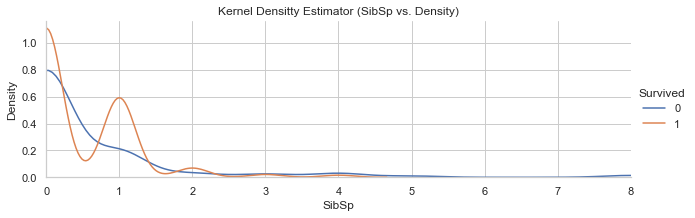

In [373]:
facet = sns.FacetGrid(train_df, hue='Survived', aspect = 3)
facet.map(sns.kdeplot, 'SibSp') # kdeplot = Kernel Density Estimator
facet.set(xlim=(0, train_df['SibSp'].max())) 
facet.add_legend()

plt.title("Kernel Densitty Estimator (SibSp vs. Density)")
plt.show()

Q) 학습 데이터 (train_df)에서, 형제-배우자 수가 없거나 (0) 형제-배우자 수가 '1'일 경우, 생존수가 사망자수보다 약간 높음 
- 형제-배우자 수를 Binning 해볼 수 있음
    - 형제-배우자 수가 '0'또는 '1'일 경우, 1 / 그 이상은 2
    - if SibSp <2, Sibbin=1
    - Others, Sibbin=2

In [374]:
for dataset in train_test_data:
    dataset.loc[dataset['SibSp']<=2, 'SibSp'] = 1
    dataset.loc[dataset['SibSp']>2, 'SibSp'] = 2
    

### 2.6. Parch = the number of parents / children aboard the Titanic

In [375]:
sur_parch = train_df[train_df['Survived']==1]['Parch'].value_counts()
dead_parch = train_df[train_df['Survived']==0]['Parch'].value_counts()
# print(sur_parch)
# print(dead_parch)
sur_dead_parch = pd.DataFrame([sur_parch, dead_parch])
sur_dead_parch.index = ['Survived', 'Dead']
print(sur_dead_parch)

              0     1     2    3    4    5    6
Survived  233.0  65.0  40.0  3.0  NaN  1.0  NaN
Dead      445.0  53.0  40.0  2.0  4.0  4.0  1.0


Q) 형제자매, 배우자, 부모, 아이 (가족관계)의 수가 적을수록 생존수가 더 많은데, 과연 상관관계가 있는가? 
- 가족관계 수가 많은 사람의 비율이 더 적어서 그럴 수도 있음. 
- 어떻게 상관관계를 찾을 것인지? 
- 생존 예측율에 영향을 주는가? 
    - 만약, 다른 정보들이 불분명할 경우, 가족관계 수로 예측을 할 수 있을 것이라 판단됨
- 지금 트레이닝 데이터 (train_df)에서는 부모-아이 (Parch)의 수가 '0'일때, 생존수가 사망자 수의 2배임. 따라서, 가족이 없을 경우 '1', 가족이 있을 경우를 '2'로 Binning을 해볼 수 있음
    - if Parch=0, Parchbin=1
    - Others, Parchbin=2

In [376]:
for dataset in train_test_data:
    dataset.loc[dataset['Parch']<=1, 'Parch']=1
    dataset.loc[dataset['Parch']>1, 'Parch']=2

### 2.7. Embarked

In [377]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [378]:
Emb_cond = "Embarked.isnull()"
df_Embarked = train_df.query(Emb_cond)
display(df_Embarked)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
61,62,1,1,"Icard, Miss. Amelie",2,0.0,1,1,113572,80.0,B28,NaN,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",2,0.0,1,1,113572,80.0,B28,NaN,1


> Embarked = NaN
61-> Sex "Female", Title "Miss", 1st class, Female, Survived -> Q
829-> Sex "Female", Title "Mrs", 1st class, Female, Survived -> Q

In [379]:
Emb_cond = "Embarked.isnull()"
df_Embarked = test_df.query(Emb_cond)
display(df_Embarked)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title


/Users/miranlee/Desktop/projects/kaggle-titanic/.venv/lib/python3.8/site-packages/seaborn/axisgrid.py:670: UserWarning:

Using the pointplot function without specifying `order` is likely to produce an incorrect plot.

/Users/miranlee/Desktop/projects/kaggle-titanic/.venv/lib/python3.8/site-packages/seaborn/axisgrid.py:675: UserWarning:

Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.



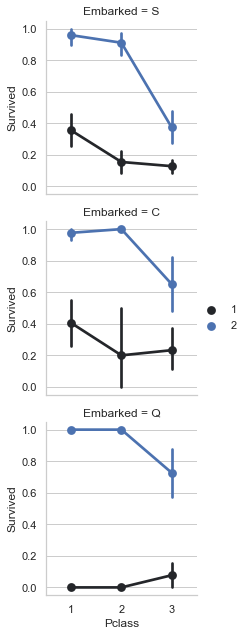

In [384]:
grid = sns.FacetGrid(train_df, row='Embarked')
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
grid.add_legend()

<AxesSubplot:>

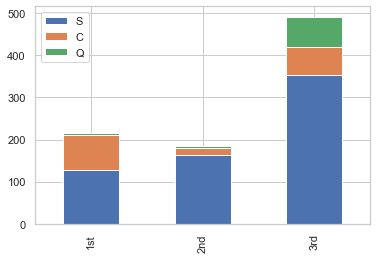

In [385]:
PcEmbark1= train_df[train_df['Pclass']==1]['Embarked'].value_counts()
PcEmbark2= train_df[train_df['Pclass']==2]['Embarked'].value_counts()
PcEmbark3= train_df[train_df['Pclass']==3]['Embarked'].value_counts()
#print(PcEmbark1)
tmp = pd.DataFrame([PcEmbark1, PcEmbark2, PcEmbark3])
tmp.index = ['1st', '2nd', '3rd']
tmp.plot(kind='bar', stacked='True')

<AxesSubplot:>

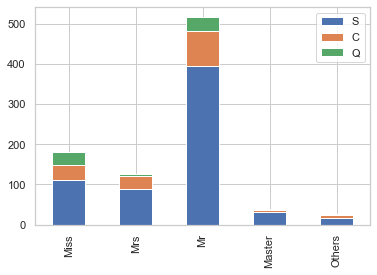

In [386]:
TitEmbark1= train_df[train_df['Title']==0]['Embarked'].value_counts()
TitEmbark2= train_df[train_df['Title']==1]['Embarked'].value_counts()
TitEmbark3= train_df[train_df['Title']==2]['Embarked'].value_counts()
TitEmbark4= train_df[train_df['Title']==3]['Embarked'].value_counts()
TitEmbark5= train_df[train_df['Title']==4]['Embarked'].value_counts()
#print(PcEmbark1)
tmp = pd.DataFrame([TitEmbark1, TitEmbark2, TitEmbark3, TitEmbark4, TitEmbark5])
tmp.index = ['Miss', 'Mrs', 'Mr', 'Master', 'Others']
tmp.plot(kind='bar', stacked='True')

In [387]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('Q')

In [388]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

### 2.8. Fare = Passenger fare

Titanic Fare Data: Five-Number Summary by Class (Nominal and Decimalised) [Ref1]
[Ref1] https://www.statisticalconsultants.co.nz/blog/titanic-fare-data.html Data Source: Encyclopedia Titanic

Fare (pounds, 1912 prices)  
        Minimum	Lower	Median	Upper Maximum
First	0.00	30.65	60.00	106.43	512.33
Second	0.00	13.00	14.50	26.00	73.50
Third	0.00	7.75	8.05	15.10	69.55
